Many of the necessary things are defined in the trainer module. Please ensure the presence of the `DRLUD_P3_ENV` environment variable pointing to the binary with the environment before launching the code.

In [1]:
import pandas as pd
import seaborn as sb

from trainer import *

Just to make the charts look bigger :)

In [2]:
sb.set(rc={'figure.figsize':(15,12)}, style="darkgrid")

Currently the only properly implemented RL algorithm in the repo is ddpg, let's use it.

In [3]:
algorithm = algorithm_factories["ddpg"]

Initialize the environment in order to get its properties (action/state sizes and the number of parallel agents if applicable)

In [4]:
env = prepare_environment()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [5]:
(brain_name, num_agents, action_size, state_size) = infer_environment_properties(env)

In [6]:
hparm = ac_parm(
    state_size,     ### DON'T CHANGE
    action_size,    ### DON'T CHANGE
    int(1e5),       ### Experience replay memory size
    brain_name,     ### DON'T CHANGE
    512,            ### Batch size
    0.99,           ### gamma
    1e-3,           ### tau
    1e-4,           ### Actor learning rate
    1e-3,           ### Critic learning rate
    0,              ### weight decay
    1,              ### number of times to rerun from scratch
    False,          ### enable OU-noise
    False,          ### enable gradient clipping
    True,           ### enable bootstrapping
    600,            ### number of episodes for bootstrapping
    1)              ### steps between learning session
seed = 1
success_score=0.5

In [7]:
agent = algorithm(hparm, seed)
scores = pd.DataFrame(
    train(
        agent, 
        env, 
        n_episodes=1100, 
        max_t=30000, 
        store_weights_to="weights.pth",
        random_action_phase_enabled=hparm.bootstrapping_enabled, 
        random_episodes_number=hparm.bootstrapping_episodes
    ))
env.close()

Episode 25	Average Score: 0.0170	Last scores: [0.09500000160187483, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291]
Episode 50	Average Score: 0.0110	Last scores: [-0.004999999888241291, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291]
Episode 75	Average Score: 0.0090	Last scores: [-0.004999999888241291, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291, 0.04500000085681677]1]
Episode 100	Average Score: 0.0080	Last scores: [-0.004999999888241291, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291, 0.04500000085681677]]
Episode 125	Average Score: 0.0050	Last scores: [-0.004999999888241291, -0.004999999888241291, 0.04500000085681677, -0.004999999888241291, -0.004999999888241291]1]
Episode 150	Average Score: 0.0050	Last scores: [-0.004999999888241291, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291, -0.004999999888241291]
Episode 175	Average Score: 0

In [27]:
scores_mean = scores.rolling(window = 100).mean().fillna(0)
f"Solved in {scores_mean[scores_mean[0] > success_score].index.min()} episodes"

'Solved in 1078 episodes'

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Episode')]

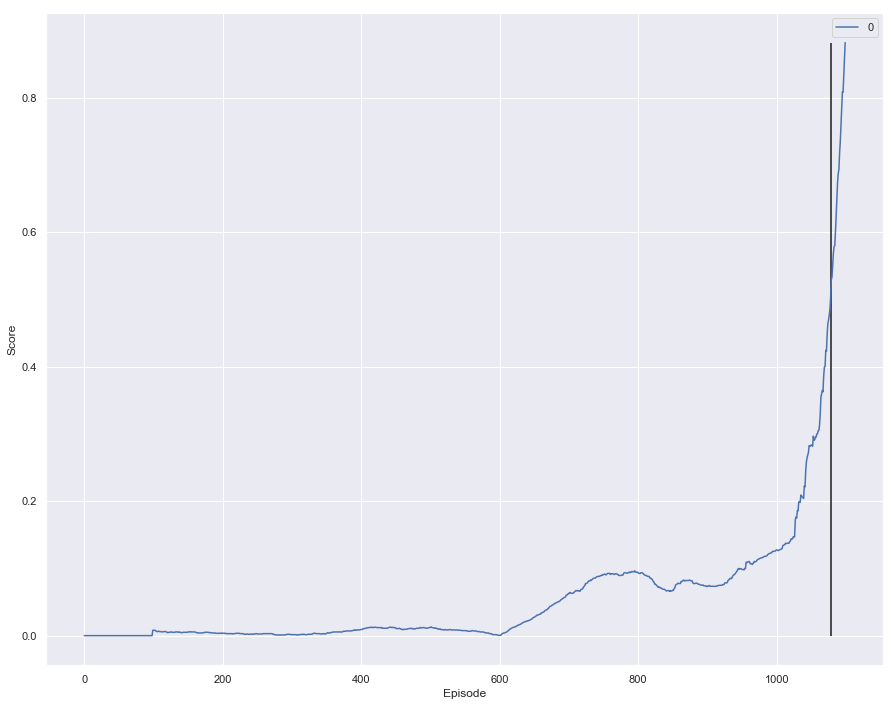

In [28]:
plt = sb.lineplot(data = scores_mean)
plt.vlines(scores_mean[scores_mean[0] > success_score].index.min(), ymin = 0, ymax = scores_mean.max())
plt.set(xlabel="Episode", ylabel="Score")